In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
data.dtypes

customerID            object
gender                object
Senior_Citizen         int64
Is_Married            object
Dependents            object
tenure                 int64
Phone_Service         object
Dual                  object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn                 object
dtype: object

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")



y = df["Churn"]
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y) 


X = df.drop(columns=["Churn", "customerID","gender",'Dual','Phone_Service'])


binary_cols = ['Is_Married', 'Dependents', 'Paperless_Billing']
service_cols = ["Streaming_TV", "Streaming_Movies", "Online_Security","Online_Backup", "Device_Protection", "Tech_Support"]
ordinal_cols = ['Payment_Method', 'Internet_Service', 'Contract']
numeric_cols = ['tenure', 'Monthly_Charges', 'Total_Charges']  

# X = df.drop(columns=numeric_cols)


for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert invalid strings to NaN
    df[col] = df[col].fillna(0)                        # fill missing values


df["Total_Charges"] = pd.to_numeric(df["Total_Charges"], errors="coerce")
df["Total_Charges"] = df["Total_Charges"].fillna(0)



# Define encoders
payment_categories = [["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"]]
payment_encoder = OrdinalEncoder(categories=payment_categories)
internet_encoder = OrdinalEncoder(categories=[["No", "DSL", "Fiber optic"]])
contract_encoder = OrdinalEncoder(categories=[["Month-to-month", "One year", "Two year"]])


# Preprocessing pipelines
binary_pipeline = Pipeline([
    ('map_binary', OrdinalEncoder())  # map Yes/No -> 0/1 automatically
])

service_pipeline = Pipeline([
    ('map_service', OrdinalEncoder())  # map service columns 0/1/2
])

ordinal_pipeline = ColumnTransformer([
    ('payment', payment_encoder, ['Payment_Method']),
    ('internet', internet_encoder, ['Internet_Service']),
    ('contract', contract_encoder, ['Contract'])
])


# Combine all preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('binary', OrdinalEncoder(), binary_cols),  # scale binary columns
    ('service', OrdinalEncoder(), service_cols),  # scale service cols (optional)
    ('ordinal', ordinal_pipeline, ordinal_cols),
    # ('numeric', StandardScaler(), numeric_cols)
])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
pipeline.fit(X_train, y_train)

# Predict
preds = pipeline.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))



Accuracy: 0.7977288857345636
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [7]:
# import pandas as pd
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OrdinalEncoder, StandardScaler
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.preprocessing import LabelEncoder



# df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")



# y = df["Churn"]
# target_encoder = LabelEncoder()
# y = target_encoder.fit_transform(y)  



# binary_cols = ['Is_Married', 'Dependents', 'Paperless_Billing']
# service_cols = ["Streaming_TV", "Streaming_Movies", "Online_Security",
#                 "Online_Backup", "Device_Protection", "Tech_Support"]
# ordinal_cols = ['Payment_Method', 'Internet_Service', 'Contract']
# numeric_cols = ['tenure', 'Monthly_Charges', 'Total_Charges']

# drop_cols = ['Churn', 'customerID', 'gender', 'Dual', 'Phone_Service']



# for col in numeric_cols:
#     df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)



# X = df.drop(columns=drop_cols)



# payment_categories = [["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"]]
# internet_categories = [["No", "DSL", "Fiber optic"]]
# contract_categories = [["Month-to-month", "One year", "Two year"]]


# preprocessor = ColumnTransformer(transformers=[
#     ('binary', OrdinalEncoder(), binary_cols),
#     ('service', OrdinalEncoder(), service_cols),
#     ('ordinal', OrdinalEncoder(categories=payment_categories + internet_categories + contract_categories), ordinal_cols),
#     ('numeric', StandardScaler(), numeric_cols)
# ])



# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', GradientBoostingClassifier(random_state=42))
# ])



# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# pipeline.fit(X_train, y_train)



# preds = pipeline.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, preds))
# print(classification_report(y_test, preds))


In [8]:
raw_df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [9]:
raw_df["Churn"].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [10]:
raw_df.head(5)

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
raw_df.describe()

,Senior_Citizen,tenure,Monthly_Charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
raw_df.isnull().sum()

customerID           0
gender               0
Senior_Citizen       0
Is_Married           0
Dependents           0
tenure               0
Phone_Service        0
Dual                 0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn                0
dtype: int64

C:\Users\rghmd\AppData\Local\Temp\ipykernel_29124\828142000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=raw_df, palette="Set2")


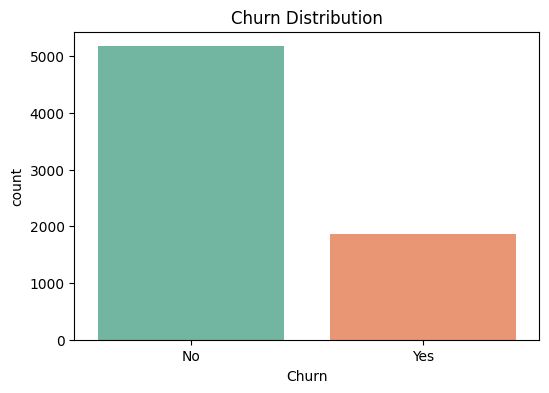

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=raw_df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

print(raw_df["Churn"].value_counts(normalize=True))

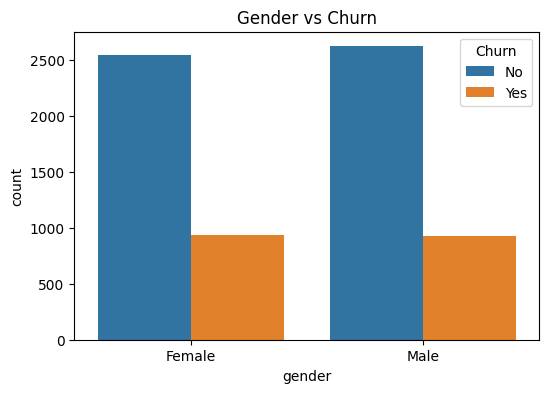

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="Churn", data=raw_df)
plt.title("Gender vs Churn")
plt.show()

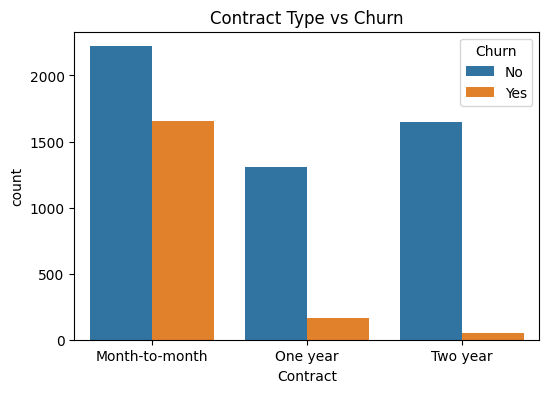

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", hue="Churn", data=raw_df)
plt.title("Contract Type vs Churn")
plt.show()

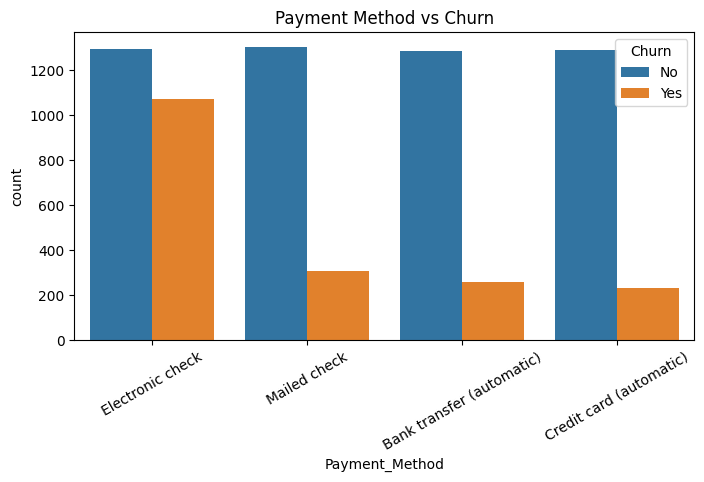

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x="Payment_Method", hue="Churn", data=raw_df)
plt.title("Payment Method vs Churn")
plt.xticks(rotation=30)
plt.show()

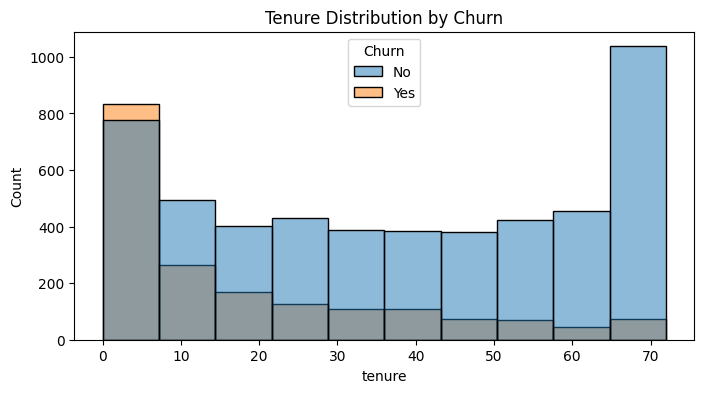

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(data=raw_df, x="tenure", hue="Churn", bins=10, kde=False)
plt.title("Tenure Distribution by Churn")
plt.show()

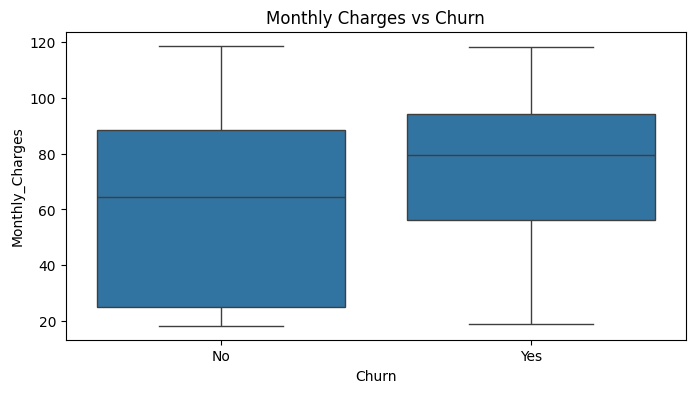

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Churn", y="Monthly_Charges", data=raw_df)
plt.title("Monthly Charges vs Churn")
plt.show()

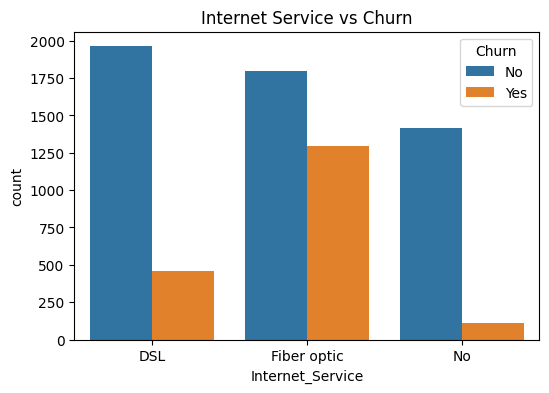

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x="Internet_Service", hue="Churn", data=raw_df)
plt.title("Internet Service vs Churn")
plt.show()

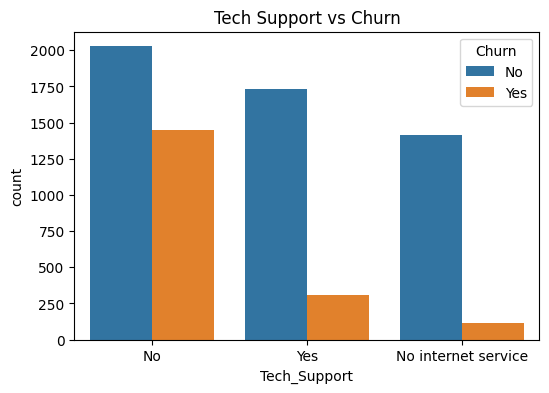

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x="Tech_Support", hue="Churn", data=raw_df)
plt.title("Tech Support vs Churn")
plt.show()

In [21]:
# from sklearn.model_selection import train_test_split

# train_df, test_df = train_test_split(
#     raw_df, test_size=0.2, random_state=42, stratify=raw_df["Churn"]
# )


# print(train_df.shape, test_df.shape)


<Axes: >

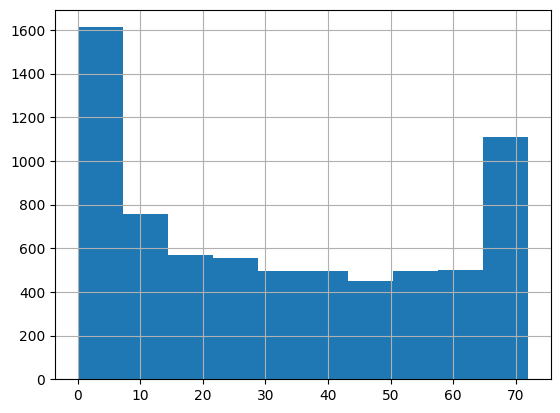

In [22]:
raw_df['tenure'].hist()

In [23]:
raw_df['Internet_Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [24]:
raw_df.head(5)

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
raw_df.dtypes

customerID            object
gender                object
Senior_Citizen         int64
Is_Married            object
Dependents            object
tenure                 int64
Phone_Service         object
Dual                  object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn                 object
dtype: object

In [26]:
raw_df[raw_df["Churn"] == "Yes"]["Payment_Method"].value_counts()


Payment_Method
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64

In [27]:
raw_df['Streaming_Movies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [28]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

def wrangle(train_df:None, test_df=None):

    if train_df is not None:
        df = train_df.copy()
        Label_Encoder = LabelEncoder()
        df['Churn'] = Label_Encoder.fit_transform(df['Churn'])

    else:
        df = test_df.copy()    
    
    df["Is_Married"] = df["Is_Married"].map({"No": 0, "Yes": 1})
    df["Dependents"] = df["Dependents"].map({"No": 0, "Yes": 1})
    df['Paperless_Billing'] = df['Paperless_Billing'].map({"No": 0, "Yes": 1})
    
    mapping = {
    "No phone service": 0,
    "No internet service": 0,
    "No": 1,
    "Yes": 2
    }

    for col in ["Streaming_TV", "Streaming_Movies", "Online_Security", 
            "Online_Backup", "Device_Protection", "Tech_Support"]:
        df[col] = df[col].map(mapping)


    encoder = OrdinalEncoder(categories=[[
        "Electronic check",
        "Mailed check",
        "Bank transfer (automatic)",
        "Credit card (automatic)"
    ]])

    df["Payment_Method"] = encoder.fit_transform(df[["Payment_Method"]]).astype(int)
    
    internet_mapping = {
    "No": 0,
    "DSL": 1,
    "Fiber optic": 2
    }

    df["Internet_Service"] = df["Internet_Service"].map(internet_mapping)
    contract_mapping = {
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2
    }

    df["Contract"] = df["Contract"].map(contract_mapping)


    df["Total_Charges"] = pd.to_numeric(df["Total_Charges"], errors="coerce")
    df["Total_Charges"] = df["Total_Charges"].fillna(0)




    df = df.drop(columns=['customerID','gender','Dual','Phone_Service'])
    
    return df

In [29]:
df = wrangle(raw_df)
df

#Internet_Service Contract 

,Senior_Citizen,Is_Married,Dependents,tenure,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,0,1,0,1,1,1,2,1,1,1,1,0,1,0,29.85,29.85,0
1,0,0,0,34,1,2,1,2,1,1,1,1,0,1,56.95,1889.50,0
2,0,0,0,2,1,2,2,1,1,1,1,0,1,1,53.85,108.15,1
3,0,0,0,45,1,2,1,2,2,1,1,1,0,2,42.30,1840.75,0
4,0,0,0,2,2,1,1,1,1,1,1,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,1,2,2,2,2,1,1,1,84.80,1990.50,0
7039,0,1,1,72,2,1,2,2,1,2,2,1,1,3,103.20,7362.90,0
7040,0,1,1,11,1,2,1,1,1,1,1,0,1,0,29.60,346.45,0
7041,1,1,0,4,2,1,1,1,1,1,1,0,1,1,74.40,306.60,1


In [30]:
raw_df.dtypes

customerID            object
gender                object
Senior_Citizen         int64
Is_Married            object
Dependents            object
tenure                 int64
Phone_Service         object
Dual                  object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn                 object
dtype: object

In [31]:
raw_df['Internet_Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [32]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, roc_auc_score, f1_score, precision_recall_curve
# from lightgbm import LGBMClassifier
# from imblearn.over_sampling import SMOTE
# import numpy as np

# y = df["Churn"]
# X = df.drop(columns=["Churn"])

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# lgbm = LGBMClassifier(
#     n_estimators=500,
#     learning_rate=0.05,
#     max_depth=-1,
#     num_leaves=31,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42
# )

# lgbm.fit(X_train_res, y_train_res)

# # Predict probabilities
# y_pred_proba = lgbm.predict_proba(X_test)[:, 1]

# # --- Find Best Threshold for F1 ---
# precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
# f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)  # avoid div by 0
# best_thresh = thresholds[np.argmax(f1_scores)]
# best_f1 = f1_scores.max()

# print("Best Threshold:", best_thresh)
# print("Best F1 Score:", best_f1)

# # Apply best threshold
# y_pred_best = (y_pred_proba >= best_thresh).astype(int)

# # Final evaluation
# print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))
# print("F1 Score (tuned):", f1_score(y_test, y_pred_best))
# print(classification_report(y_test, y_pred_best))


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


# Split features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train model
clf = GradientBoostingClassifier()
clf.fit(X_train_scaled, y_train)

# Evaluate
preds = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))


Accuracy: 0.8062455642299503
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

